<a href="https://colab.research.google.com/github/nelsonbjr/Covid19_Crisis/blob/master/COVID_19_ANALISANDO_DADOS_COM_PYTHON_28MAR20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OBTENDO OS DADOS**


In [0]:
import pandas as pd
import numpy as np
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
casos.tail()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


## **CASOS COVID-19 NO MUNDO**

In [13]:
casos = np.sum(casos.iloc[ : , 4 : casos.shape[1]])
casos.index = pd.DatetimeIndex(casos.index)
casos.tail()


2020-03-24    418045
2020-03-25    467653
2020-03-26    529591
2020-03-27    593291
2020-03-28    660706
dtype: int64

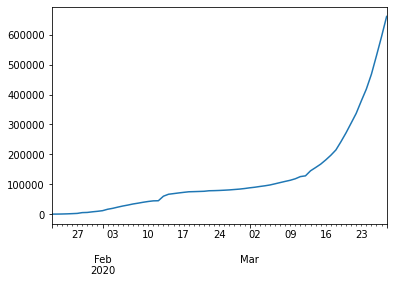

In [14]:
casos.plot()

## **MORTES POR COVID-19 NO MUNDO**



In [15]:
mortes = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
mortes.shape

(253, 71)

In [16]:
mortes = np.sum(mortes.iloc[ : , 4 : mortes.shape[1]])
mortes.index = pd.DatetimeIndex(mortes.index)
mortes.tail()

2020-03-24    18625
2020-03-25    21181
2020-03-26    23970
2020-03-27    27198
2020-03-28    30652
dtype: int64

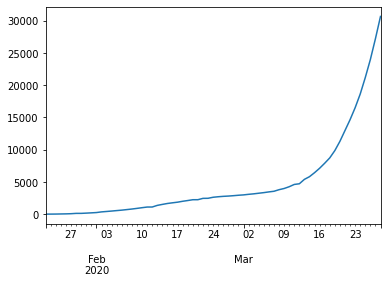

In [17]:
mortes.plot()

## **MORTALIDADE**


In [19]:
mortalidade = (mortes/casos)*100
mortalidade.tail()

2020-03-24    4.455262
2020-03-25    4.529213
2020-03-26    4.526134
2020-03-27    4.584260
2020-03-28    4.639280
dtype: float64

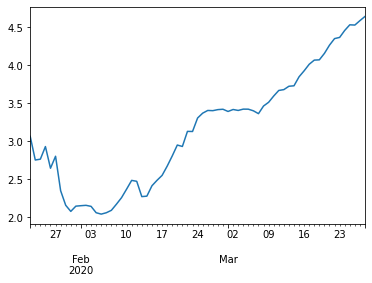

In [20]:
mortalidade.plot()

![alt text](https://)

## **CARREGANDO DADOS DE PACIENTES RECUPERADOS**


In [0]:
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recuperados.shape


In [22]:
recuperados = np.sum(recuperados.iloc[ : , 4 : recuperados.shape[1]])
recuperados.index = pd.DatetimeIndex(recuperados.index)
recuperados.tail()

2020-03-24    108000
2020-03-25    113787
2020-03-26    122150
2020-03-27    130915
2020-03-28    139415
dtype: int64

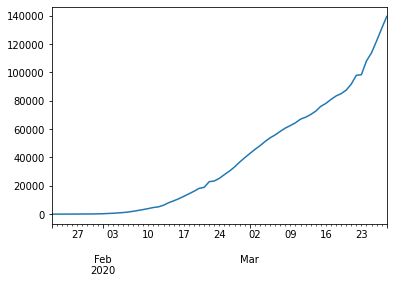

In [23]:
recuperados.plot()

In [24]:
ativos = casos - (recuperados+mortes)
ativos.tail()

2020-03-24    291420
2020-03-25    332685
2020-03-26    383471
2020-03-27    435178
2020-03-28    490639
dtype: int64

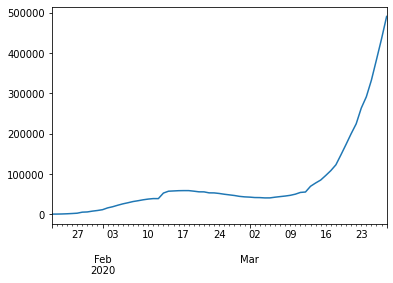

In [25]:
ativos.plot()

In [26]:
df = pd.concat([casos, ativos, recuperados, mortes], axis=1)
df.tail()

,0,1,2,3
2020-03-24,418045,291420,108000,18625
2020-03-25,467653,332685,113787,21181
2020-03-26,529591,383471,122150,23970
2020-03-27,593291,435178,130915,27198
2020-03-28,660706,490639,139415,30652


In [27]:
df.columns = (["casos", "ativos", "recuperados", "mortes"])
df.tail()

,casos,ativos,recuperados,mortes
2020-03-24,418045,291420,108000,18625
2020-03-25,467653,332685,113787,21181
2020-03-26,529591,383471,122150,23970
2020-03-27,593291,435178,130915,27198
2020-03-28,660706,490639,139415,30652


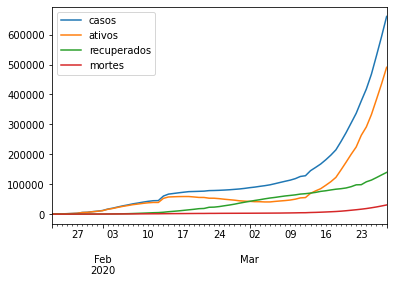

In [28]:
df.plot()